# Линейная алгебра: сходство текстов и аппроксимация функций

Данное задание основано на материалах секции, посвященной введению в линейную алгебру. Вам понадобится компьютер с установленным интерпретатором Python и подключенными библиотеками NumPy и SciPy.

## Вы научитесь:

    читать тексты из файла с помощью Python и разбивать их на слова
    переводить тексты в векторные пространства, вычислять расстояния в этих пространствах
    решать системы линейных уравнений
    приближать любые функции с помощью многочленов

## Введение

В этом задании вы познакомитесь с некоторыми базовыми методами из линейной алгебры, реализованными в пакете SciPy — в частности, с методами подсчета косинусного расстояния и решения систем линейных уравнений. Обе эти задачи еще много раз встретятся нам в специализации. Так, на решении систем линейных уравнений основана настройка линейных моделей — очень большого и важного класса алгоритмов машинного обучения. Косинусное расстояние же часто используется в анализе текстов для измерения сходства между ними.
Материалы

    Справка по функциям пакета scipy.linalg: http://docs.scipy.org/doc/scipy/reference/linalg.html
    Справка по работе с файлами в Python: https://docs.python.org/2/tutorial/inputoutput.html#reading-and-writing-files
    Справка по регулярным выражениям в Python (если вы захотите узнать про них чуть больше): https://docs.python.org/2/library/re.html

## Инструкция по выполнению

Данное задание состоит из двух частей. В каждой ответом будет набор чисел, который вам нужно будет ввести в соответствующее поле через пробел.
## Задача 1: сравнение предложений

Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

    кошки (животные)
    UNIX-утилита cat для вывода содержимого файлов
    версии операционной системы OS X, названные в честь семейства кошачьих

Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

Выполните следующие шаги:

    Скачайте файл с предложениями (sentences.txt).
    Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().
    Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.
    Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.
    Создайте матрицу размера n d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 254 22.
    Найдите косинусное расстояние от первого предложения до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нулевому по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание.
    Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).
    Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

Разумеется, использованный вами метод крайне простой. Например, он не учитывает формы слов (так, cat и cats он считает разными словами, хотя по сути они означают одно и то же), не удаляет из текстов артикли и прочие ненужные слова. Позже мы будем подробно изучать анализ текстов, где выясним, как достичь высокого качества в задаче поиска похожих предложений.

## Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

где через x_1, ..., x_n обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

    Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
    Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
    Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
    Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).


In [7]:
import numpy as np
from scipy.spatial import distance
from math import sin, exp
import re

In [8]:
d = {}
m = np.ones((22, 254))

#Сначала создадим словарь, ключами которого будут все слова, встречающиеся в тексте
with open('sentences.txt') as inf:
    for line in inf:
        line = line.strip().lower()
        t = re.split('[^a-z]', line)
        print(list(filter(None, t)))
        for x in list(filter(None, t)):
            d[x] = [0]*22
            
#Теперь заполним словарь
count = 0 #Номер предложения
with open('sentences.txt') as inf:
    for line in inf:
        line = line.strip().lower()
        t = re.split('[^a-z]', line)
        for x in list(filter(None, t)):
            d[x][count] = list(filter(None, t)).count(x)
        count+=1

#Заполняем массив
for i in range(0,22):
    for j in range(0, 254):
        m[i,j] = d[list(d.keys())[j]][i]

#Массив с косинусными расстояниями
cos_dist = []
cos_dist_copy = []
for i in range(1,22):
    cos_dist.append(distance.cosine(m[0, :], m[i,:]))
    cos_dist_copy.append(distance.cosine(m[0, :], m[i,:]))
#Два минимальных расстояния
print(cos_dist)

res_1 = cos_dist.index(min(cos_dist))+1
cos_dist.remove(min(cos_dist))
res_2 = cos_dist_copy.index(min(cos_dist))+1

print(res_1, res_2)

#Запись в файл
with open('submission-1.txt', 'w') as ouf:
    ouf.write(str(res_1)+" ")
    ouf.write(str(res_2))
    

['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process']
['as', 'cat', 'simply', 'catenates', 'streams', 'of', 'bytes', 'it', 'can', 'be', 'also', 'used', 'to', 'concatenate', 'binary', 'files', 'where', 'it', 'will', 'just', 'concatenate', 'sequence', 'of', 'bytes']
['a', 'common', 'interactive', 'use', 'of', 'cat', 'for', 'a', 'single', 'file', 'is', 'to', 'output', 'the', 'content', 'of', 'a', 'file', 'to', 'standard', 'output']
['cats', 'can', 'hear', 'sounds', 'too', 'faint', 'or', 'too', 'high', 'in', 'frequency', 'for', 'human', 'ears', 'such', 'as', 'those', 'made', 'by', 'mice', 'and', 'other', 'small', 'animals']
['in', 'one', 'people', 'deliberately', 'tamed', 'cats', 'in', 'a', 'process', 'of', 'artificial', 'selection', 'as', 'they', 'were', 'useful', 'predators', 'of', 'vermin']
['the', 'domesticated', 'cat', 'and', 'its', 'closest', 'wild', 'ancestor', 'are', 'both', 'diploid', 'organisms', 't

In [9]:
from pylab import *

In [11]:
def f(x):   
    return sin(x / 5.) * exp(x / 10.) + 5 * exp(-x / 2.)

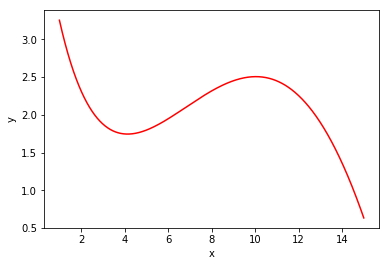

In [12]:
x = np.arange(1, 15.01, 0.01)
figure()
plot(x, f(x), 'r')
xlabel('x')
ylabel('y')
show()

[[ 1  1]
 [ 1 15]]
[[ 3.25221687]
 [ 0.63522142]]
[[ 3.43914511]
 [-0.18692825]]


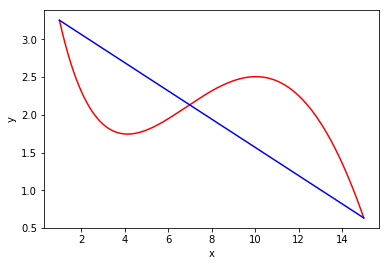

In [13]:
#Первая степень многочлена
x_1 = 1
x_2 = 15
F = np.array([f(x_1), f(x_2)]).reshape(2,1)
X = np.array([[1, x_1], [1, x_2]])
print(X)
print(F)
W = np.linalg.solve(X, F)
print(W)

def predict_model(x):
    return W[0]+W[1]*x

#Рисуем
x = np.arange(1, 15.01, 0.01)
figure()
plot(x, f(x), 'r')
plot(x, predict_model(x), 'b')
xlabel('x')
ylabel('y')
show()

[[ 3.32512949]
 [-0.06531159]
 [-0.00760104]]


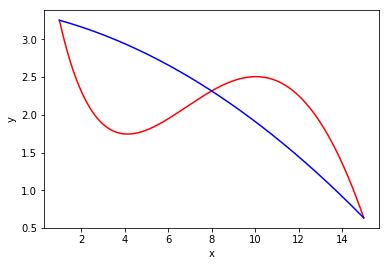

In [14]:
#Вторая степень многочлена
x_1 = 1
x_2 = 8
x_3 = 15

F = np.array([f(x_1), f(x_2), f(x_3)])
X = np.array([[1, x_1, x_1**2], [1, x_2, x_2**2], [1, x_3, x_3**2]])
W = np.linalg.solve(X, F[:, np.newaxis])
print(W)

def predict_model(x):
    return W[0]+W[1]*x+W[2]*(x**2)

x = np.arange(1, 15.01, 0.01)
figure()
plot(x, f(x), 'r')
plot(x, predict_model(x), 'b')
xlabel('x')
ylabel('y')
show()

[[ 4.36264154]
 [-1.29552587]
 [ 0.19333685]
 [-0.00823565]]


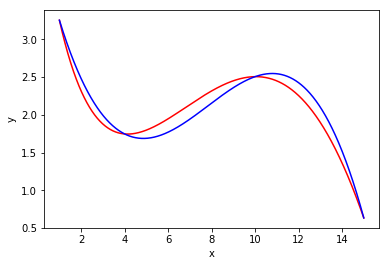

In [15]:
#Третья степень многочлена
x_1 = 1
x_2 = 4
x_3 = 10
x_4 = 15

F = np.array([f(x_1), f(x_2), f(x_3), f(x_4)])
X = np.array([[1, x_1, x_1**2, x_1**3], [1, x_2, x_2**2, x_2**3], [1, x_3, x_3**2, x_3**3], [1, x_4, x_4**2, x_4**3]])
W = np.linalg.solve(X, F[:, np.newaxis])
print(W)

def predict_model(x):
    return W[0]+W[1]*x+W[2]*(x**2)+W[3]*(x**3)

x = np.arange(1, 15.01, 0.01)
figure()
plot(x, f(x), 'r')
plot(x, predict_model(x), 'b')
xlabel('x')
ylabel('y')
show()

In [16]:
#Запись в файл
print(W.shape)
with open('submission-2.txt', 'w') as ouf:
    ouf.write(str(W[0][0])+" ")
    ouf.write(str(W[1][0])+" ")
    ouf.write(str(W[2][0])+" ")
    ouf.write(str(W[3][0]))

(4, 1)
